In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv("../1.csv", header= None)

In [54]:
df.head()

,0,1,2,3,4
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [55]:
df.columns=['Time', 'X', 'Y', 'Z', 'Activity']

In [56]:
df.head()

,Time,X,Y,Z,Activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1


In [57]:
df.shape

(162501, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162501 entries, 0 to 162500
Data columns (total 5 columns):
Time        162501 non-null float64
X           162501 non-null int64
Y           162501 non-null int64
Z           162501 non-null int64
Activity    162501 non-null int64
dtypes: float64(1), int64(4)
memory usage: 6.2 MB


In [59]:
df.isnull().sum()

Time        0
X           0
Y           0
Z           0
Activity    0
dtype: int64

In [60]:
df['Activity'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: Activity, dtype: int64

In [61]:
df = df.drop(df[df.Activity.isin([0])].index)

In [62]:
df["Activity"].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: Activity, dtype: int64

In [63]:
Fs = 52
activities = df['Activity'].value_counts().index
Activity = {1: 'Working on Pc',
            2: 'Standing Up, Walking and Going up\down stairs',
           3: 'Standing',
           4: 'Walking',
           5: 'Climbing stairs',
            6: 'Walking and Talking with Someone',
           7: 'Talking'}

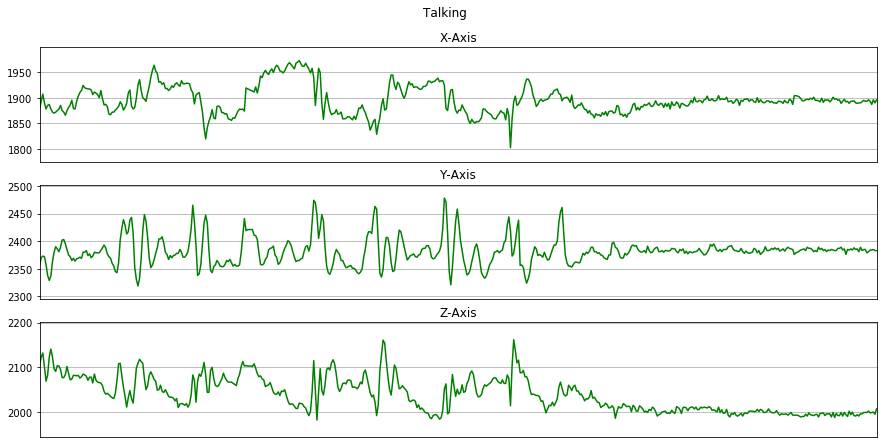

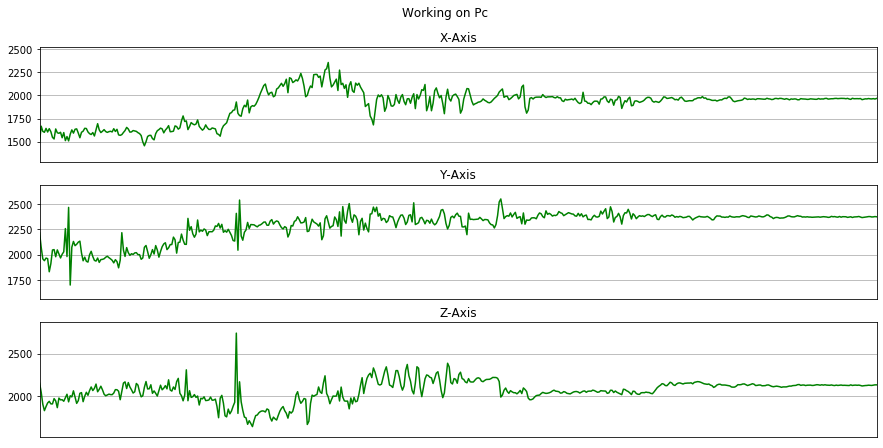

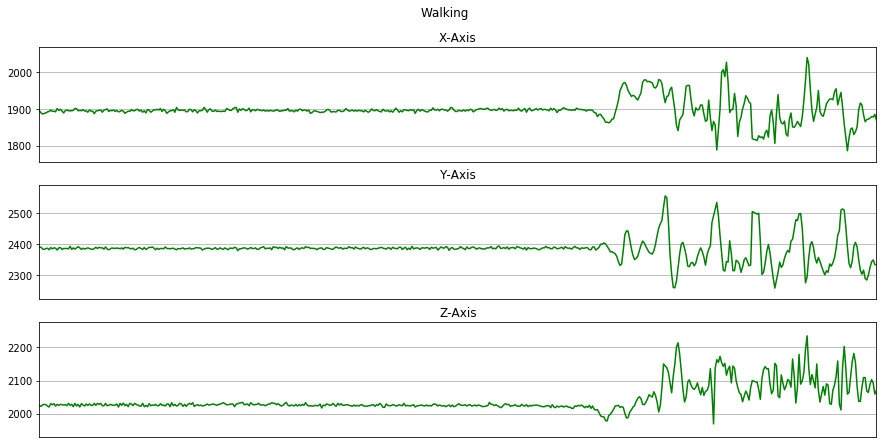

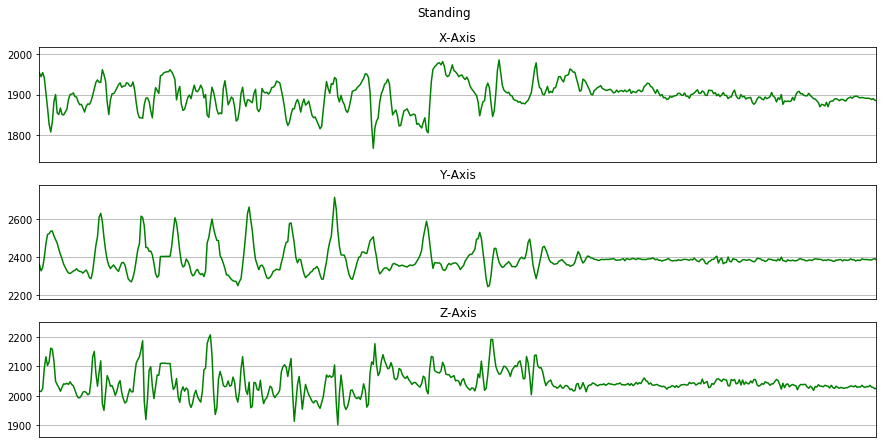

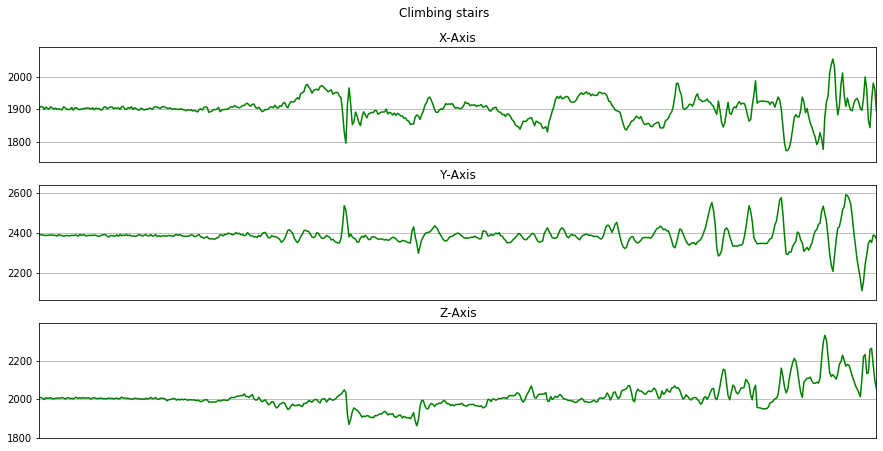

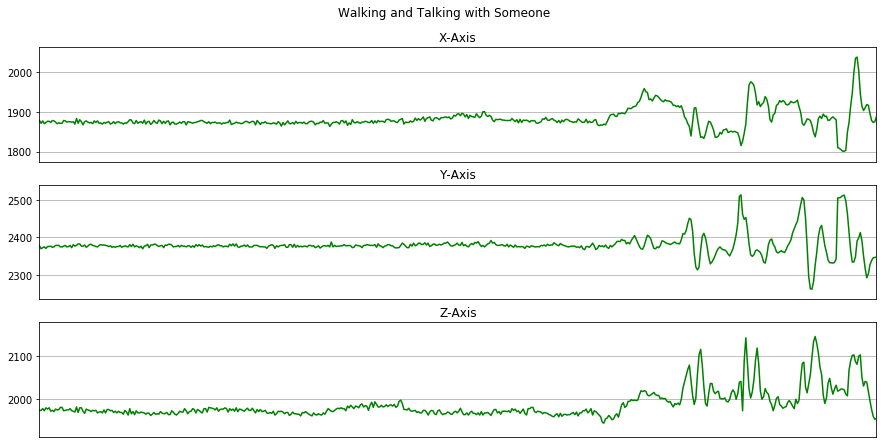

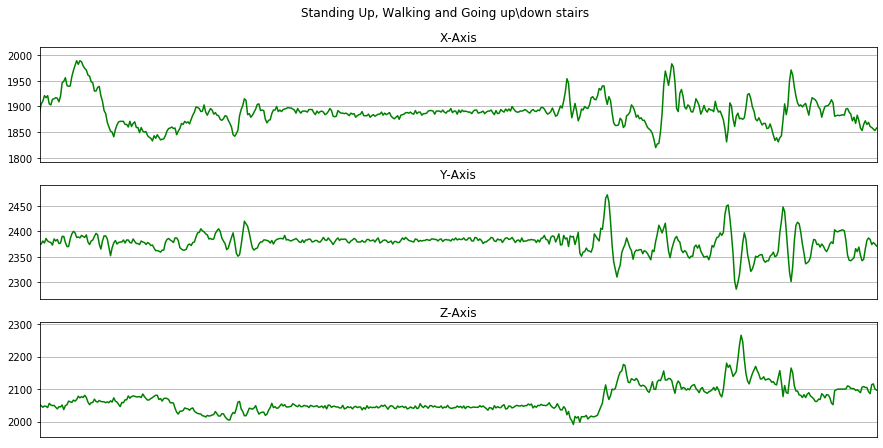

In [64]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['Time'], data['X'], 'X-Axis')
    plot_axis(ax1, data['Time'], data['Y'], 'Y-Axis')
    plot_axis(ax2, data['Time'], data['Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(Activity[activity])
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = df[(df['Activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [65]:
df = df.drop(['Time'], axis = 1).copy()

In [66]:
df.head()

,X,Y,Z,Activity
0,1502,2215,2153,1
1,1667,2072,2047,1
2,1611,1957,1906,1
3,1601,1939,1831,1
4,1643,1965,1879,1


In [67]:
df['Activity'].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: Activity, dtype: int64

In [68]:
df['Activity'] = df['Activity'].replace([1,2,3,4,5,6,7],[0,1,2,3,4,5,6])
df['Activity'].value_counts()

6    83748
0    33677
3    26860
2    11179
4     3191
5     2917
1      928
Name: Activity, dtype: int64

In [69]:
WorkingPC = df[df['Activity']==0].head(928).copy()
StandingUp_Walking_Stairs = df[df['Activity']==1].head(928).copy()
Standing = df[df['Activity']==2].head(928).copy()
Walking = df[df['Activity']==3].head(928).copy()
ClimbingStairs = df[df['Activity']==4].head(928).copy()
Walking_Talking = df[df['Activity']==5].head(928).copy()
Talking = df[df['Activity']==6].head(928).copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([WorkingPC, StandingUp_Walking_Stairs, Standing, Walking, ClimbingStairs, Walking_Talking, Talking])

In [70]:
balanced_data.shape

(6496, 4)

In [71]:
balanced_data.head()

,X,Y,Z,Activity
0,1502,2215,2153,0
1,1667,2072,2047,0
2,1611,1957,1906,0
3,1601,1939,1831,0
4,1643,1965,1879,0


In [72]:
balanced_data['Activity'].value_counts()

3    928
6    928
2    928
5    928
1    928
4    928
0    928
Name: Activity, dtype: int64

In [73]:
input_data = balanced_data[['X', 'Y', 'Z']]
label = balanced_data['Activity']

scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)

processed_data = pd.DataFrame(data = input_data, columns = ['x', 'y', 'z'])
processed_data['label'] = label.values

processed_data.head()

,x,y,z,label
0,-6.617363,-2.267855,1.553221,0
1,-3.872145,-4.308915,-0.002875,0
2,-4.803855,-5.950327,-2.072776,0
3,-4.970232,-6.207244,-3.173787,0
4,-4.271449,-5.836142,-2.469140,0


In [74]:
processed_data.shape

(6496, 4)

In [75]:
processed_data.to_csv('CSV1_processed2.csv')